# 导包

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = ['SimHei']
plt.rcParams['axes.unicode_minus']=False
import torch
from torch import nn
import torch.nn.functional as F
from sklearn.model_selection import train_test_split

from mpl_toolkits.mplot3d import Axes3D

import warnings
warnings.filterwarnings("ignore")

# 数据查看

In [2]:
df=pd.read_excel('./C题数据.xlsx')

In [3]:
df.head(5)

,组号,编号,厚度mm,孔隙率（%）,压缩回弹性率（%）,过滤阻力Pa,过滤效率（%）,透气性 mm/s,热风速度(r/min),接收距离(cm),插层率（%）
0,1.0,1#,1.715,93.52,77.84,8.130,4.967,777.10,800,40,0.00
1,NaN,2#,2.810,96.28,83.20,7.533,19.967,1019.67,800,40,36.44
2,2.0,1#,1.830,93.93,86.23,10.470,1.933,795.57,900,40,0.00
3,NaN,2#,2.910,96.41,86.65,7.200,24.967,968.63,900,40,24.74
4,3.0,1#,1.890,94.12,82.12,11.870,4.300,564.93,1000,40,0.00


In [4]:
df=df.drop ('组号',axis=1)

In [5]:
before=df[df['编号']=='1#']
after=df[df['编号']=='2#']
before.index = range(len(before))
after.index = range(len(after))

# 问题一

## 插层前后对比图

In [6]:
myfont = mpl.font_manager.FontProperties(fname = r"STKAITI.TTF")

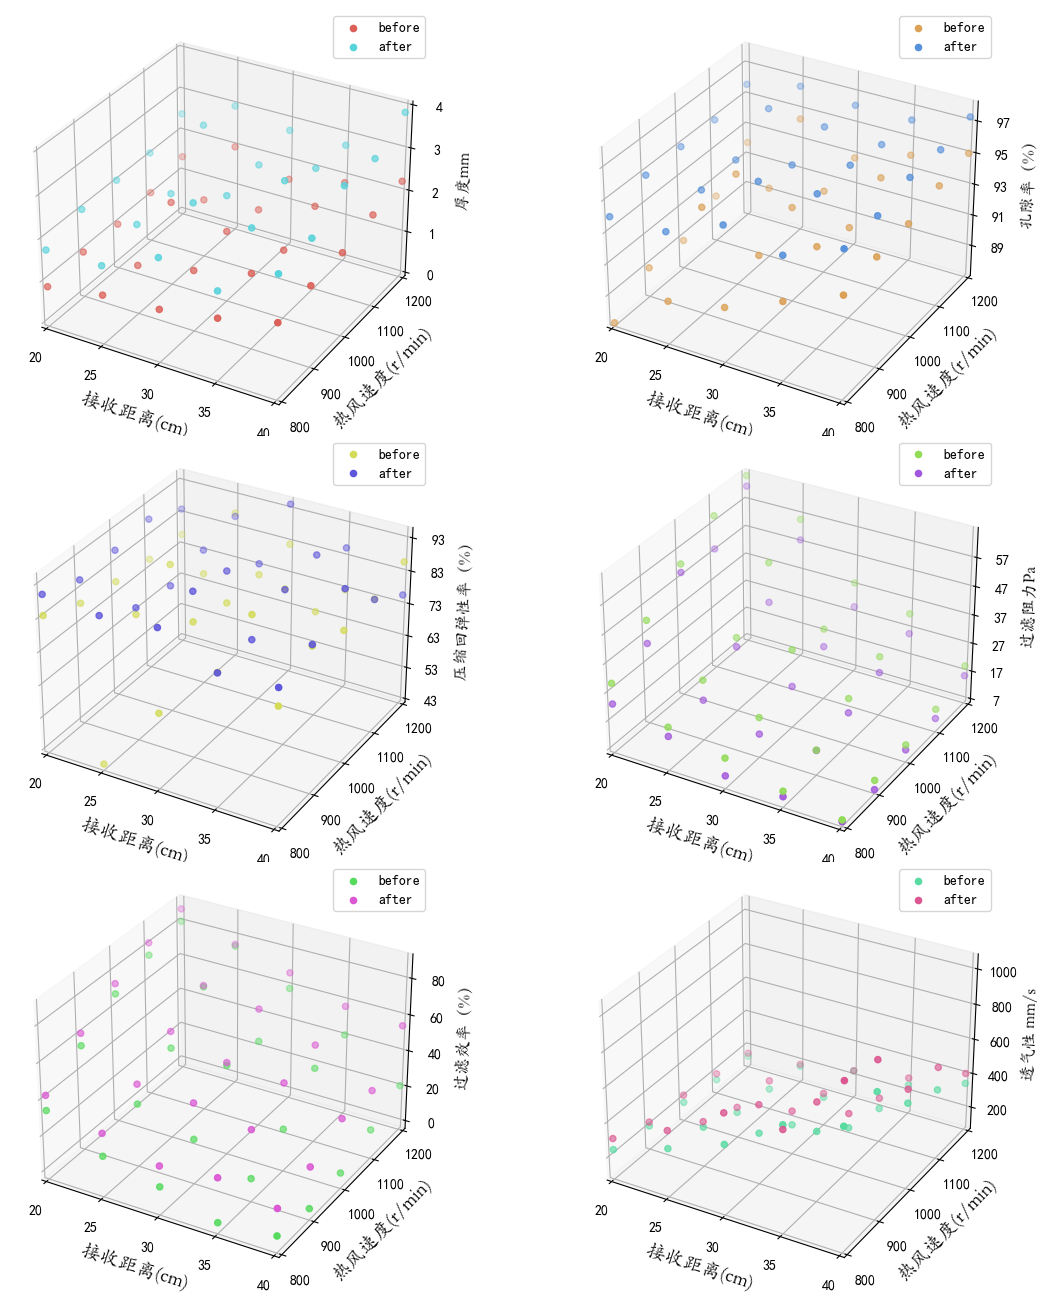

In [7]:
fig =plt.figure(figsize=(15, 15), dpi=100)


ax1=fig.add_subplot(321, projection='3d')
ax1.scatter(before['接收距离(cm)'],before['热风速度(r/min)'], before['厚度mm'], label="before",color=sns.color_palette("hls",12)[0])
ax1.scatter(after['接收距离(cm)'],after['热风速度(r/min)'], after['厚度mm'], label="after",color=sns.color_palette("hls",12)[6])
ax1.set_xlim(20,40)
ax1.set_ylim(800,1200)
ax1.set_zlim(0.87,4)
ax1.set_xticks( range(20,45,5),fontsize=24 )
ax1.set_yticks(range(800,1250,100) )
ax1.set_zticks(range(0,5) )
ax1.set_zlabel(' 厚度mm', fontsize=12, fontproperties=myfont)
ax1.set_ylabel('热风速度(r/min)',rotation=60,fontsize=14, fontproperties=myfont)
ax1.set_xlabel('接收距离(cm)',rotation=60,fontsize=14, fontproperties=myfont)
ax1.legend()


ax2 =fig.add_subplot(322, projection='3d')
ax2.scatter(before['接收距离(cm)'],before['热风速度(r/min)'], before['孔隙率（%）'], label="before",color=sns.color_palette("hls",12)[1])
ax2.scatter(after['接收距离(cm)'],after['热风速度(r/min)'], after['孔隙率（%）'], label="after",color=sns.color_palette("hls",12)[7])
ax2.set_xlim(20,40)
ax2.set_ylim(800,1200)
ax2.set_zlim(87.23,98)
ax2.set_xticks(range(20,45,5),fontsize=24 )
ax2.set_yticks(range(800,1250,100))
ax2.set_zticks(range(89,98,2))
ax2.set_zlabel(' 孔隙率（%）',fontsize=12, fontproperties=myfont)
ax2.set_ylabel('热风速度(r/min)',rotation=60,fontsize=14, fontproperties=myfont)
ax2.set_xlabel('接收距离(cm)',rotation=60,fontsize=14, fontproperties=myfont)
ax2.legend()


ax3 =fig.add_subplot(323, projection='3d')
ax3.scatter(before['接收距离(cm)'],before['热风速度(r/min)'], before['压缩回弹性率（%）'], label="before",color=sns.color_palette("hls",12)[2])
ax3.scatter(after['接收距离(cm)'],after['热风速度(r/min)'], after['压缩回弹性率（%）'], label="after",color=sns.color_palette("hls",12)[8])
ax3.set_xlim(20,40)
ax3.set_ylim(800,1200)
ax3.set_zlim(43.91,95)
ax3.set_xticks( range(20,45,5),fontsize=24 )
ax3.set_yticks(range(800,1250,100),rotation=90 )
ax3.set_zticks( range(43,95,10),fontsize=24 )
ax3.set_zlabel(' 压缩回弹性率（%）',fontsize=12, fontproperties=myfont)
ax3.set_ylabel('热风速度(r/min)',rotation=60,fontsize=14, fontproperties=myfont)
ax3.set_xlabel('接收距离(cm)',rotation=60,fontsize=14, fontproperties=myfont)
ax3.legend()

ax4 =fig.add_subplot(324, projection='3d')
ax4.scatter(before['接收距离(cm)'],before['热风速度(r/min)'], before['过滤阻力Pa'], label="before",color=sns.color_palette("hls",12)[3])
ax4.scatter(after['接收距离(cm)'],after['热风速度(r/min)'], after['过滤阻力Pa'], label="after",color=sns.color_palette("hls",12)[9])
ax4.set_xlim(20,40)
ax4.set_ylim(800,1200)
ax4.set_zlim(7.2,66)
ax4.set_xticks(range(20,41,5),fontsize=24 )
ax4.set_yticks(range(800,1201,100),rotation=90 )
ax4.set_zticks(range(7,66,10),fontsize=24 )

ax4.set_zlabel(' 过滤阻力Pa',fontsize=12, fontproperties=myfont)
ax4.set_ylabel('热风速度(r/min)',rotation=60,fontsize=14, fontproperties=myfont)
ax4.set_xlabel('接收距离(cm)',rotation=60,fontsize=14, fontproperties=myfont) 
ax4.legend()

ax5 = ax1=fig.add_subplot(325, projection='3d')
ax5.scatter(before['接收距离(cm)'],before['热风速度(r/min)'], before['过滤效率（%）'], label="before",color=sns.color_palette("hls",12)[4])
ax5.scatter(after['接收距离(cm)'],after['热风速度(r/min)'], after['过滤效率（%）'], label="after",color=sns.color_palette("hls",12)[10])
ax5.set_xlim(20,40)
ax5.set_ylim(800,1200)
ax5.set_xticks(range(20,45,5),fontsize=24 )
ax5.set_yticks(range(800,1250,100),rotation=90 )
ax5.set_zlabel(' 过滤效率（%）',fontsize=12, fontproperties=myfont)
ax5.set_ylabel('热风速度(r/min)',rotation=60,fontsize=14, fontproperties=myfont)
ax5.set_xlabel('接收距离(cm)',rotation=60,fontsize=14, fontproperties=myfont)
ax5.legend()

ax6 =fig.add_subplot(326, projection='3d')
ax6.scatter(before['接收距离(cm)'],before['热风速度(r/min)'], before['透气性 mm/s'], label="before",color=sns.color_palette("hls",12)[5])
ax6.scatter(after['接收距离(cm)'],after['热风速度(r/min)'], after['透气性 mm/s'], label="after",color=sns.color_palette("hls",12)[11]) 
ax6.set_xlim(20,40)
ax6.set_ylim(800,1200)
ax6.set_xticks(range(20,41,5),fontsize=24 )
ax6.set_yticks(range(800,1201,100),rotation=90 )
ax6.set_zlabel(' 透气性 mm/s',fontsize=12, fontproperties=myfont)
ax6.set_ylabel('热风速度(r/min)',rotation=60,fontsize=14, fontproperties=myfont)
ax6.set_xlabel('接收距离(cm)',rotation=60,fontsize=14, fontproperties=myfont)
ax6.legend()


plt.subplots_adjust(left=0.15, right=0.9, bottom=0.05, top=0.9,wspace=0.01, hspace=0.01)
plt.show()

## 生成新数据

In [8]:
diff = pd.concat([pd.DataFrame(np.array(after.iloc[:, 1: 7]),columns=["厚度mm", "孔隙率（%）", "压缩回弹性率（%）", "过滤阻力Pa", "过滤效率（%）", "透气性 mm/s"],index=range(0,25))
                 -pd.DataFrame(np.array(before.iloc[:, 1: 7]),columns=["厚度mm", "孔隙率（%）", "压缩回弹性率（%）", "过滤阻力Pa", "过滤效率（%）", "透气性 mm/s"],index=range(0,25)), 
                 pd.DataFrame(np.array(after.iloc[:, 7: 10]),columns=["热风速度(r/min)", "接收距离(cm)", "插层率（%）"],index=range(0,25))], axis=1)

## 计算均值

In [9]:
diff.mean()

厚度mm              1.08860
孔隙率（%）            3.51200
压缩回弹性率（%）         7.18120
过滤阻力Pa           -5.62708
过滤效率（%）          14.39464
透气性 mm/s         74.53040
热风速度(r/min)    1000.00000
接收距离(cm)         30.00000
插层率（%）           23.03560
dtype: float64

In [10]:
diff_ave = pd.concat([pd.DataFrame(np.array(after.iloc[:, 1: 7]),columns=["厚度mm", "孔隙率（%）", "压缩回弹性率（%）", "过滤阻力Pa", "过滤效率（%）", "透气性 mm/s"],index=range(0,25))
                 /pd.DataFrame(np.array(before.iloc[:, 1: 7]),columns=["厚度mm", "孔隙率（%）", "压缩回弹性率（%）", "过滤阻力Pa", "过滤效率（%）", "透气性 mm/s"],index=range(0,25))-1, 
                 pd.DataFrame(np.array(after.iloc[:, 7: 10]),columns=["热风速度(r/min)", "接收距离(cm)", "插层率（%）"],index=range(0,25))], axis=1)
diff_ave.mean()   

厚度mm              0.756717
孔隙率（%）            0.038389
压缩回弹性率（%）         0.113668
过滤阻力Pa           -0.197959
过滤效率（%）           1.979736
透气性 mm/s          0.206430
热风速度(r/min)    1000.000000
接收距离(cm)         30.000000
插层率（%）           23.035600
dtype: float64

## 按插层率排序

In [11]:
diff.sort_values(by="插层率（%）", inplace=True, ascending=True)
diff.index = range(len(diff))

## 读取数据

In [12]:
df3 = pd.read_excel('./C题数据.xlsx', sheet_name='data3')

In [13]:
df3.head()

,接收距离(cm),热风速度(r/min),厚度mm,孔隙率（%）,压缩回弹性率（%）,过滤阻力Pa,过滤效率（%）,透气性 mm/s,插层率（%）
0,40,800,2.766014,96.204429,84.763264,24.756047,48.211693,654.149177,a
1,40,800,2.754933,95.879200,84.969388,26.008212,51.443315,609.854645,a
2,40,800,2.756595,95.965270,84.648600,26.222296,49.679948,635.112175,a
3,40,900,3.051175,96.114384,85.315207,27.167856,48.599384,521.793019,a
4,40,900,3.051480,96.924714,85.365072,25.323787,45.963814,553.848607,a


## 产量相关图

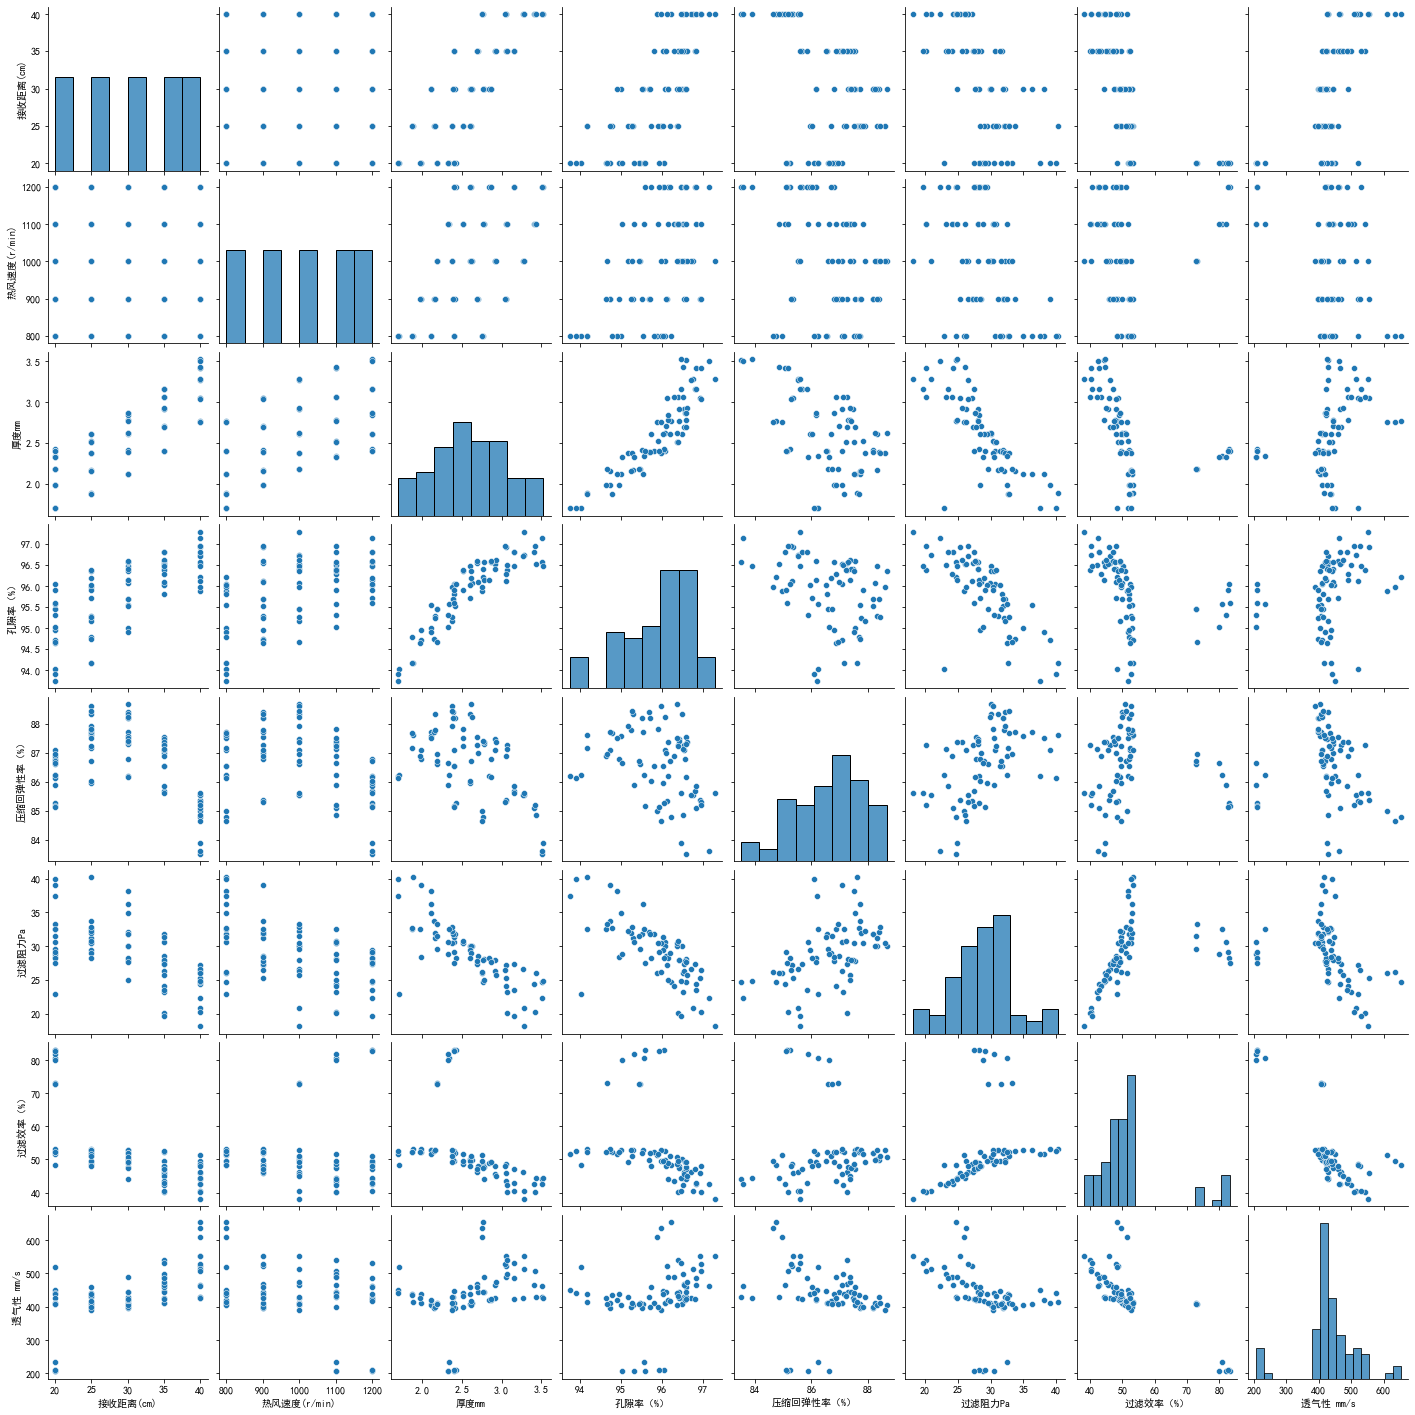

In [14]:
sns.pairplot(df3);

In [15]:
df3.corr()

,接收距离(cm),热风速度(r/min),厚度mm,孔隙率（%）,压缩回弹性率（%）,过滤阻力Pa,过滤效率（%）,透气性 mm/s
接收距离(cm),1.000000e+00,6.396779e-16,0.816890,0.730050,-0.402620,-0.611067,-0.677469,0.636270
热风速度(r/min),6.396779e-16,1.000000e+00,0.555201,0.521922,-0.320321,-0.472472,0.090113,-0.301408
厚度mm,8.168898e-01,5.552010e-01,1.000000,0.896965,-0.527047,-0.795244,-0.482529,0.353674
孔隙率（%）,7.300497e-01,5.219222e-01,0.896965,1.000000,-0.323640,-0.736532,-0.400708,0.278720
压缩回弹性率（%）,-4.026198e-01,-3.203214e-01,-0.527047,-0.323640,1.000000,0.497562,-0.010066,-0.165227
过滤阻力Pa,-6.110671e-01,-4.724723e-01,-0.795244,-0.736532,0.497562,1.000000,0.374042,-0.410408
过滤效率（%）,-6.774692e-01,9.011290e-02,-0.482529,-0.400708,-0.010066,0.374042,1.000000,-0.788960
透气性 mm/s,6.362700e-01,-3.014081e-01,0.353674,0.278720,-0.165227,-0.410408,-0.788960,1.000000


<AxesSubplot:>

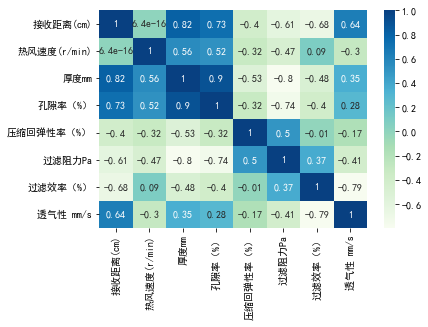

In [16]:
sns.heatmap(df3.corr(), annot=True, cmap='GnBu')

## 搭建网络

In [17]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        self.net1 = nn.Sequential(nn.Linear(2, 3))
        self.net2 = nn.Sequential(nn.Linear(3, 5))
        self.net3 = nn.Sequential(nn.Linear(5, 4))
        self.net4 = nn.Sequential(nn.Linear(4, 3))
        
    def forward(self, x):
        x = self.net1(x)
        x = F.softplus(x)
        x = self.net2(x)
        x = F.softplus(x)
        x = self.net3(x)
        x = F.softplus(x)
        x = self.net4(x)
        return x

In [18]:
model = torch.load('./model1.pkl')

In [19]:
params = list(model.parameters())
np.set_printoptions(suppress=True)
print(params)

[Parameter containing:
tensor([[-3.6872e-01, -5.6670e-02, -2.2345e-01,  2.0806e-02, -3.9294e-01],
        [-3.0750e-01, -1.0187e-02, -1.6398e-02,  1.2617e-01, -5.9837e-02],
        [ 1.6262e-01, -1.0252e-01, -2.5388e-01,  1.1603e-01, -3.7516e-01],
        [-1.4146e+00, -5.8941e-02, -7.2830e+00,  6.8694e-01,  2.0673e+00],
        [ 1.2103e-01, -4.3176e-01,  3.7155e-01,  2.9659e-01, -3.5665e-01],
        [-4.1452e-01, -4.8679e-02, -2.9305e-01,  1.8500e-01,  1.4116e-01],
        [-4.3822e-01, -2.0217e-01, -3.9095e-01, -1.2966e-01,  3.1410e-01],
        [-1.5605e-02, -2.1925e-01, -3.9405e-01,  2.0713e-03, -4.7712e-02]],
       requires_grad=True), Parameter containing:
tensor([-0.0157, -0.0619,  0.0746,  0.9631,  0.1225,  0.2145, -0.1449,  0.1691],
       requires_grad=True), Parameter containing:
tensor([[ 0.1021,  0.1687,  0.2869, -0.1785, -0.2025,  0.0345,  0.0536,  0.0382],
        [ 0.3142,  0.2887, -0.2018, -0.1088, -0.3322, -0.3343, -0.1063, -0.3342],
        [ 0.1588, -0.1311,  0.3

## 第三问

In [20]:
class Net2(nn.Module):
    def __init__(self):
        super(Net2, self).__init__()
        
        self.net1 = nn.Sequential(nn.Linear(3, 6))
        self.net2 = nn.Sequential(nn.Linear(6, 5))
        self.net3 = nn.Sequential(nn.Linear(5, 3))
        
    def forward(self, x):
        x = self.net1(x)
        x = F.softplus(x)
        x = self.net2(x)
        x = F.softplus(x)
        x = self.net3(x)
        return x

In [21]:
data2 = torch.tensor(df3.iloc[:, 2: 5].values, dtype=torch.float)
target2 = torch.tensor(df3.iloc[:, 5: 8].values, dtype=torch.float)

In [22]:
x_train,x_val,y_train,y_val = train_test_split(data2,target2,
                                               test_size=0.2,random_state=20)
train = torch.cat([x_train, y_train], dim=1)
val = torch.cat([x_val, y_val], dim=1)

In [23]:
less_loss = 10000

In [24]:
train.shape,val.shape

(torch.Size([60, 6]), torch.Size([15, 6]))

In [25]:
# model2 = Net2()
model2 = torch.load('./model2.pkl')
opt = torch.optim.Adam(model2.parameters(), lr=0.00001)
loss_func = torch.nn.MSELoss()

In [26]:
p = list(model2.parameters())
p

[Parameter containing:
 tensor([[-3.6872e-01, -5.6670e-02, -2.2345e-01,  2.0806e-02, -3.9294e-01],
         [-3.0750e-01, -1.0187e-02, -1.6398e-02,  1.2617e-01, -5.9837e-02],
         [ 1.6262e-01, -1.0252e-01, -2.5388e-01,  1.1603e-01, -3.7516e-01],
         [-1.4141e+00, -5.9192e-02, -7.2826e+00,  6.8729e-01,  2.0676e+00],
         [ 1.2103e-01, -4.3176e-01,  3.7155e-01,  2.9659e-01, -3.5665e-01],
         [-4.1452e-01, -4.8679e-02, -2.9305e-01,  1.8500e-01,  1.4116e-01],
         [-4.3822e-01, -2.0217e-01, -3.9095e-01, -1.2966e-01,  3.1410e-01],
         [-1.5605e-02, -2.1925e-01, -3.9405e-01,  2.0713e-03, -4.7712e-02]],
        requires_grad=True),
 Parameter containing:
 tensor([-0.0157, -0.0619,  0.0746,  0.9635,  0.1225,  0.2145, -0.1449,  0.1691],
        requires_grad=True),
 Parameter containing:
 tensor([[ 0.1021,  0.1687,  0.2869, -0.1785, -0.2025,  0.0345,  0.0536,  0.0382],
         [ 0.3142,  0.2887, -0.2018, -0.1088, -0.3322, -0.3343, -0.1063, -0.3342],
         [ 0.158